## Extract the Data

## Source
U.S. Census Bureau and U.S. Department of Housing and Urban Development, Median Sales Price of Houses Sold for the United States [MSPUS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MSPUS, December 21, 2023.

In [11]:
import pandas as pd

# Replace 'path_to_file' with the path to your CSV file
housing_prices_df = pd.read_csv('Resources/MSPUS.csv')
print(housing_prices_df.head())


         DATE    MSPUS
0  1971-07-01  25300.0
1  1971-10-01  25500.0
2  1972-01-01  26200.0
3  1972-04-01  26800.0
4  1972-07-01  27900.0


In [12]:
# Converting the 'DATE' column to a datetime object
housing_prices_df['DATE'] = pd.to_datetime(housing_prices_df['DATE'])
housing_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    209 non-null    datetime64[ns]
 1   MSPUS   209 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


## Visualize the Data

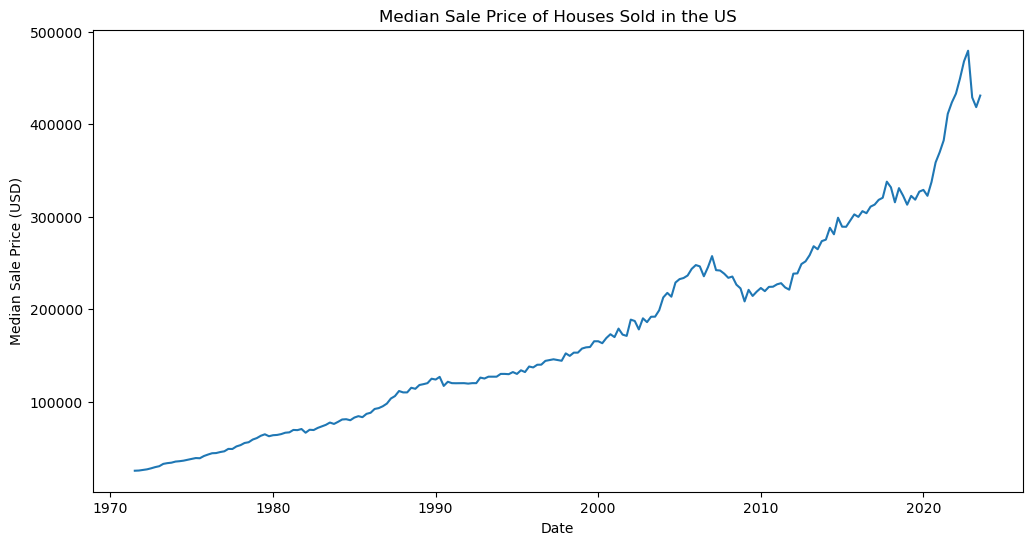

In [13]:
# Code for initial visualization of the U.S. Housing Prices data
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(housing_prices_df['DATE'], housing_prices_df['MSPUS'])
plt.title('Median Sale Price of Houses Sold in the US')
plt.xlabel('Date')
plt.ylabel('Median Sale Price (USD)')
plt.show()


In [14]:
# Display summary statistics
print(housing_prices_df['MSPUS'].describe())


count       209.000000
mean     172489.952153
std      107407.234771
min       25300.000000
25%       80700.000000
50%      145000.000000
75%      238700.000000
max      479500.000000
Name: MSPUS, dtype: float64


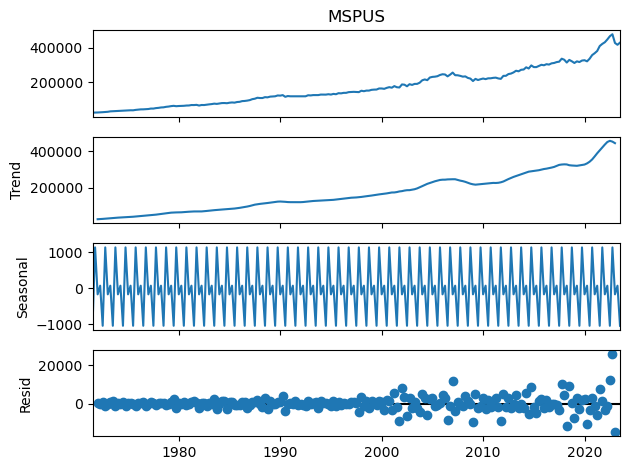

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(housing_prices_df.set_index('DATE')['MSPUS'], model='additive', period=4)

# Plot the decomposed time series components
decomposition.plot()
plt.show()


## Cleanse the Data for Prophet

In [16]:
# Code to cleanse and prepare the data for Prophet
from prophet import Prophet

# Prepare the data for Prophet
prophet_df = housing_prices_df.rename(columns={'DATE': 'ds', 'MSPUS': 'y'})
prophet_df.head()

,ds,y
0,1971-07-01,25300.0
1,1971-10-01,25500.0
2,1972-01-01,26200.0
3,1972-04-01,26800.0
4,1972-07-01,27900.0


## Visualizations and Predictions with Prophet

16:08:43 - cmdstanpy - INFO - Chain [1] start processing
16:08:43 - cmdstanpy - INFO - Chain [1] done processing


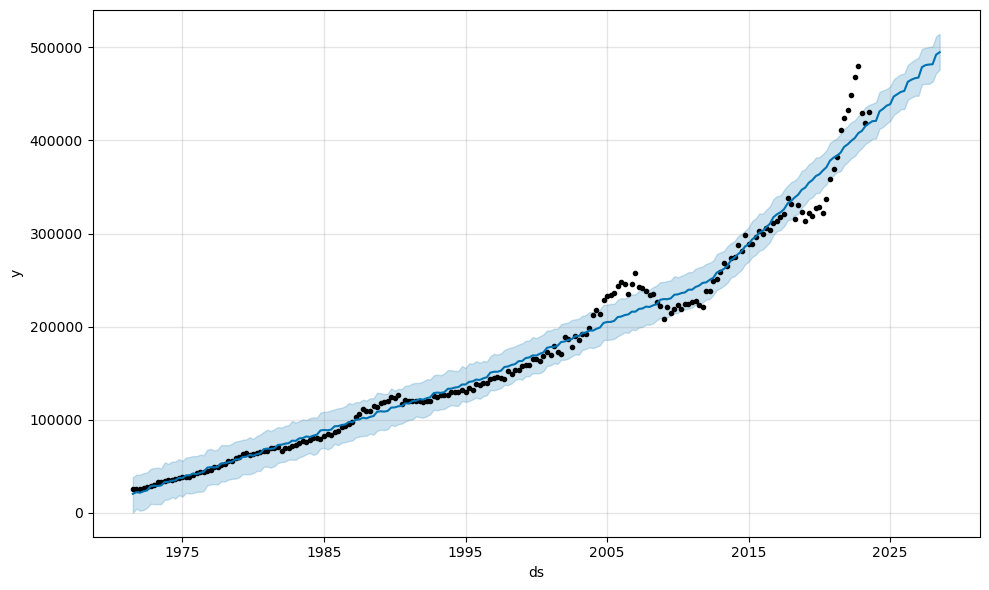

In [17]:
# Create and fit the model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=4 * 5, freq='Q') # 5 years of quarterly predictions

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

# Additional analysis - Growth Rate

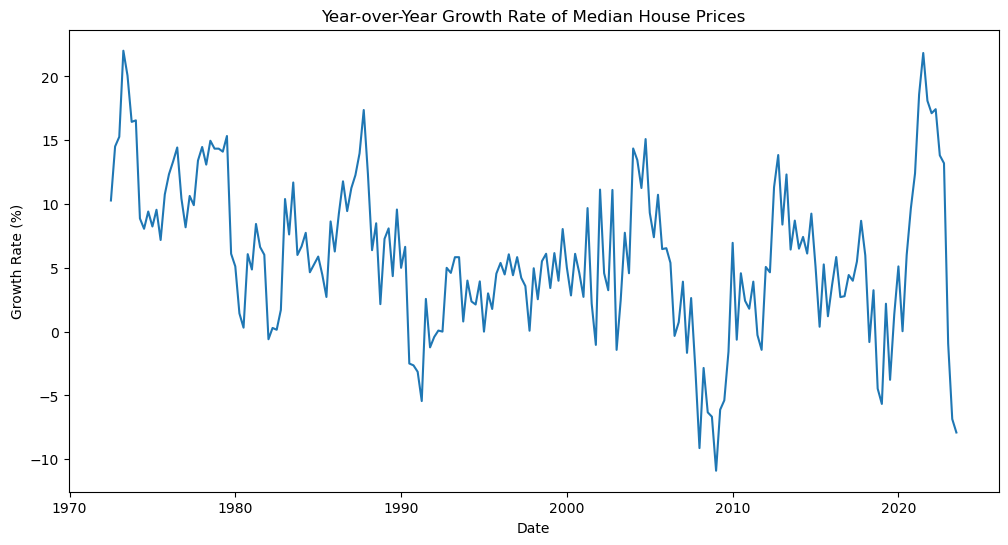

In [18]:
# Calculate year-over-year growth rate and store it as a new dataframe
housing_prices_yoy_df = housing_prices_df[['DATE', 'MSPUS']].copy()
housing_prices_yoy_df['YoY Growth'] = housing_prices_yoy_df['MSPUS'].pct_change(periods=4) * 100
# Plot the growth rate
plt.figure(figsize=(12, 6))
plt.plot(housing_prices_yoy_df['DATE'], housing_prices_yoy_df['YoY Growth'])
plt.title('Year-over-Year Growth Rate of Median House Prices')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.show()


## Extract the Cleansed Data into a CSV

In [19]:
# Extracting each derived data set from the original data set into a csv file
housing_prices_df.to_csv('Resources/MSPUS.csv', index=False)
housing_prices_yoy_df.to_csv('Resources/MSPUS_YoY.csv', index=False)
forecast.to_csv('Resources/MSPUS_forecast.csv', index=False)





# Conclusions

1. **Median Sale Price Trend (First Graph):**
   - There's a clear long-term upward trend in the median sale price of houses sold in the U.S. since the 1970s, indicating a general increase in housing prices over time. The sharp increase, particularly noticeable from the early 2000s and spiking in the most recent years, suggests a rapid growth in housing prices, which could be influenced by various factors, including market demand, housing supply constraints, and economic conditions.

2. **Time Series Decomposition (Second Graph):**
   - The decomposition graph indicates that the median sale price of houses has a strong upward trend component, reflecting the general price increase over time.
   - The seasonal component shows regular fluctuations within each year, which could be due to seasonal buying patterns, such as increased buying in spring and summer.
   - The residual component, which shows the noise after removing the trend and seasonality, does not show any clear patterns, suggesting that the trend and seasonality components capture most of the systematic information in the time series.

3. **CPI Prediction (Third Graph):**
   - The predictive model indicates a continued increase in the median sale price of houses. The model’s confidence interval widens as it moves further into the future, reflecting increased uncertainty in longer-term predictions.

4. **Year-over-Year Growth Rate (Fourth Graph):**
   - The year-over-year growth rate of median house prices shows significant variability, with periods of both sharp increases and decreases. This could be indicative of the housing market's responsiveness to economic cycles, interest rates, and other macroeconomic factors.
   - The extreme volatility in growth rates, particularly the sharp increase in the most recent data point, may warrant further investigation to understand the underlying causes — it could be related to market reactions to the COVID-19 pandemic, changes in interest rates, or supply chain disruptions.


